In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
try:
    possam = pd.read_csv('possum.csv')
    print("Let's go........")
except:
    print('No such dataset')

Let's go........


In [4]:
# check first 5 elements
possam.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [5]:
# check last 5 elements
possam.tail()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


In [6]:
# check shape
possam.shape

(104, 14)

In [7]:
# More understanding of the dataset -> 

possam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [8]:
# check datatypes of all the columns -> 

possam.dtypes

case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

In [9]:
# Let's replace the empty strings with NaN values

possam = possam.replace(' ', np.nan)

In [10]:
# Let's replace the question marks (?) with NaN values

possam = possam.replace('?', np.nan)

In [11]:
# Let's replace the question marks (.) with NaN values

possam = possam.replace('.', np.nan)

In [14]:
# check the count of features/ non-null values in each column -> 

possam.count()

case        104
site        104
Pop         104
sex         104
age         102
hdlngth     104
skullw      104
totlngth    104
taill       104
footlgth    103
earconch    104
eye         104
chest       104
belly       104
dtype: int64

In [15]:
# check summary statistics of all numerical columns -> 

possam.describe().T

,count,mean,std,min,25%,50%,75%,max
case,104.0,52.500000,30.166206,1.0,26.750,52.50,78.250,104.0
site,104.0,3.625000,2.349086,1.0,1.000,3.00,6.000,7.0
age,102.0,3.833333,1.909244,1.0,2.250,3.00,5.000,9.0
hdlngth,104.0,92.602885,3.573349,82.5,90.675,92.80,94.725,103.1
skullw,104.0,56.883654,3.113426,50.0,54.975,56.35,58.100,68.6
totlngth,104.0,87.088462,4.310549,75.0,84.000,88.00,90.000,96.5
taill,104.0,37.009615,1.959518,32.0,35.875,37.00,38.000,43.0
footlgth,103.0,68.459223,4.395306,60.3,64.600,68.00,72.500,77.9
earconch,104.0,48.130769,4.109380,40.3,44.800,46.80,52.000,56.2
eye,104.0,15.046154,1.050374,12.8,14.400,14.90,15.725,17.8


In [12]:
# determine the number of unique categories in each variable: The output of the preceding code shows the number of distinct categories per variable, that is, the cardinality:

possam.nunique()

case        104
site          7
Pop           2
sex           2
age           9
hdlngth      71
skullw       64
totlngth     34
taill        19
footlgth     75
earconch     69
eye          35
chest        19
belly        24
dtype: int64

Text(0.5, 1.0, 'Cardinality')

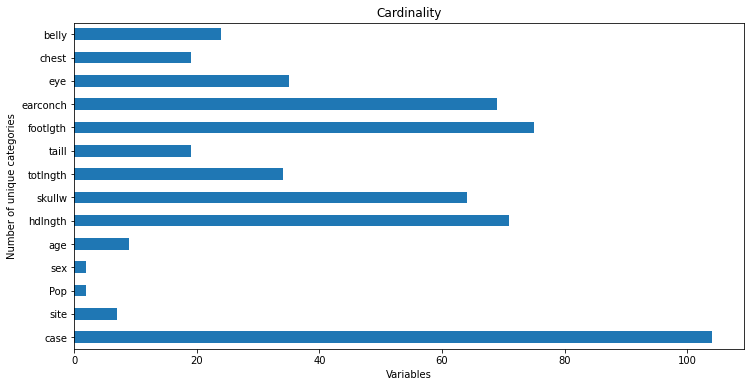

In [13]:
# plot the cardinality:

possam.nunique().plot.barh(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [16]:
# check for duplicates

possam.duplicated().sum()

0

In [17]:
# check missing values -> 

possam.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [18]:
# print names or check all columns which have null values -> 


[val for val in possam.columns if possam[val].isnull().sum() > 0]

['age', 'footlgth']

In [19]:
# print the percentage of missing values -> 

mask = possam.isnull()

total = mask.sum()

percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',keys=['count_missing', 'percentage_missing (%)'])

missing_data.sort_values(by='percentage_missing (%)', ascending=False,inplace=True)

missing_data

,count_missing,percentage_missing (%)
age,2,1.923077
footlgth,1,0.961538
case,0,0.000000
site,0,0.000000
Pop,0,0.000000
sex,0,0.000000
hdlngth,0,0.000000
skullw,0,0.000000
totlngth,0,0.000000
taill,0,0.000000


In [20]:
# print the nullable columns -> 

nullable_columns = possam.columns[mask.any()].tolist()

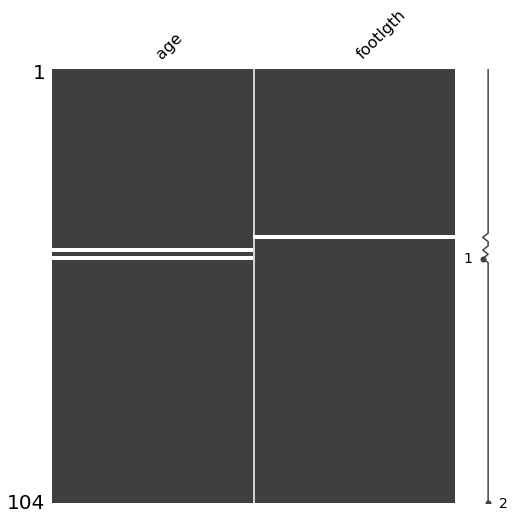

In [22]:
# use `seaborn` libraries to plot the matrix and heatmap of nullable columns

msno.matrix(possam[nullable_columns], figsize=(8,8))

plt.show()

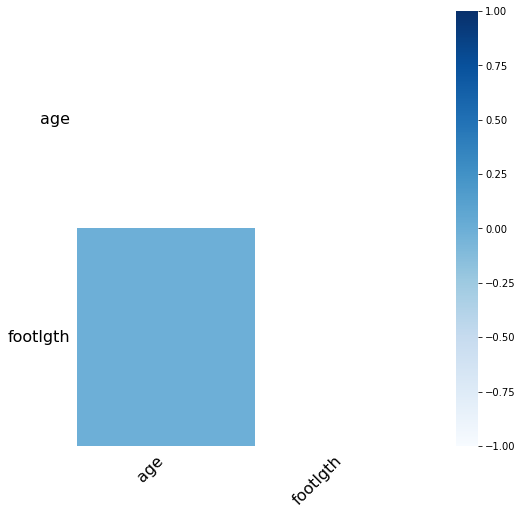

In [25]:
msno.heatmap(possam[nullable_columns], figsize=(8,8), cmap='Blues')

plt.show()

<AxesSubplot:>

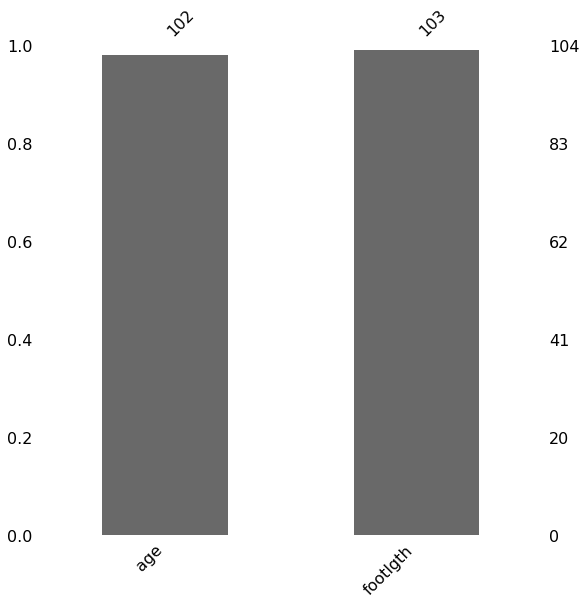

In [26]:
msno.bar(possam[nullable_columns], figsize=(9,9))

In [28]:
possam['age'].fillna((possam['age'].mean()), inplace=True)

In [30]:
possam['footlgth'].fillna((possam['footlgth'].mean()), inplace=True)

In [32]:
possam.isna().sum().sum()

0

In [33]:
possam.sample(n=2)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.500000,52.0,14.2,30.0,34.5
40,41,2,Vic,f,5.0,88.4,57.0,83.0,36.5,68.459223,40.3,15.9,27.0,30.5


In [34]:
possam.sex.nunique()

2

In [35]:
possam.Pop.nunique()

2

In [36]:
# label encoding

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [37]:
possam['sex'] = label_encoder.fit_transform(possam['sex'])
possam['Pop'] = label_encoder.fit_transform(possam['Pop'])

In [41]:
possam.sample(n=2)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
93,94,7,1,1,7.0,91.8,57.6,84.0,35.5,64.2,45.1,14.4,29.0,35.0
1,2,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


====

In [42]:
# X and y variables
X = possam.drop('hdlngth', axis=1)

In [43]:
X.head()

,case,site,Pop,sex,age,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,1,8.0,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,0,6.0,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,0,6.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,0,6.0,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,0,2.0,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [44]:
y = possam['hdlngth']

In [45]:
y.head()

0    94.1
1    92.5
2    94.0
3    93.2
4    91.5
Name: hdlngth, dtype: float64

In [46]:
y.name

'hdlngth'

[0.02026426 0.02065499 0.01018604 0.0398725  0.06274194 0.34803729
 0.23785603 0.01836215 0.04128723 0.02283602 0.0341881  0.08555727
 0.05815619]


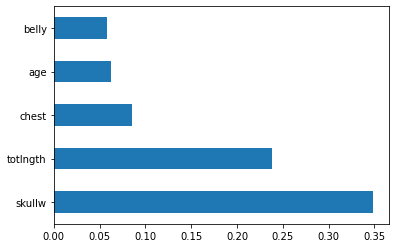

In [47]:
# Check the feature importances

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

print(model.feature_importances_)

# plot the graph of feature importances for better visualizations

f_importance = pd.Series(model.feature_importances_, index=X.columns)
f_importance.nlargest(5).plot(kind='barh') # if there are many features pick the top 5
plt.show()

In [48]:
# Do a Train/Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X,y,test_size=0.2)

In [49]:
X_train.shape

(83, 13)

In [50]:
X_test.shape

(21, 13)

`Model Training`

In [51]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor()

In [52]:
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [54]:
y_pred = decision_tree_regressor.predict(X_test)

=====

In [55]:
# evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

2.0380952380952393
6.520952380952385
0.5494251360777637


                55% accurate

====

`Deployment`

In [56]:
import pickle

In [60]:
pickle.dump(decision_tree_regressor, open('decision_tree_regressor.pkl', 'wb'))

In [61]:
pickled_model = pickle.load(open('decision_tree_regressor.pkl', 'rb'))

`predict`

In [62]:
pickled_model.predict([[1, 1, 0, 1, 8.0	, 0.4, 89.0, 36.0, 74.5, 54.5, 15.2, 28.0, 36.0]])

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([85.8])

In [63]:
pickled_model.predict([[2, 1, 0, 0, 6.0, 57.6, 91.5, 36.5, 72.5, 51.2, 16.0, 28.5, 33.0]])

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([92.5])